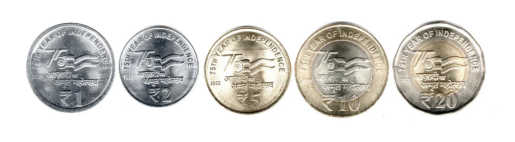

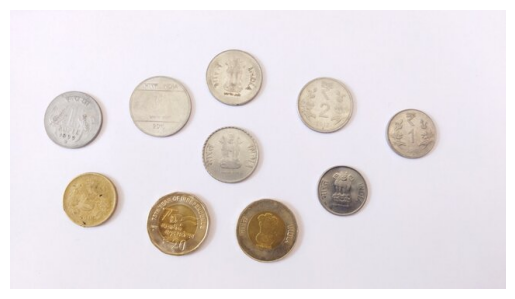

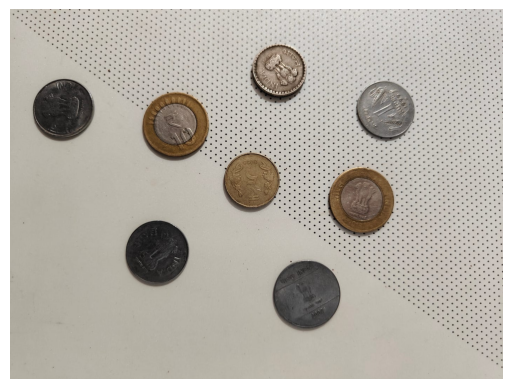

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Load image
def load_image(image_path):
    # if image not present
    if not os.path.isfile(image_path):
        print(f"Image file not found: {image_path}")
        return None
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    return image

image1 = load_image('images/coins1.webp')
image2 = load_image('images/coins2.jpg')
image3 = load_image('images/coins3.jpg')

In [27]:

def edge_detection(image, color_space, method):
    if image is None:
        print("Error: Cannot perform edge detection on NoneType image.")
        return None

    if color_space == 'gray':
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    elif color_space == 'inverted':
        gray = cv2.bitwise_not(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY))
    else:
        print(f"Error: Unknown color space {color_space}")
        return None

    if method == 'canny':
        return cv2.Canny(gray, 100, 200)
    elif method == 'marr-hildreth':
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)
        return cv2.Laplacian(blurred, cv2.CV_64F)
    else:
        print(f"Error: Unknown edge detection method {method}")
        return None


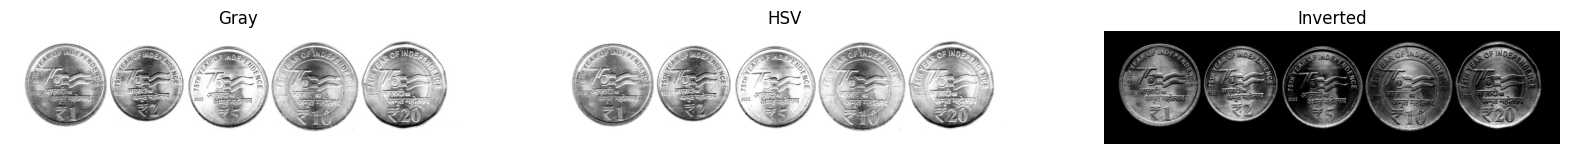

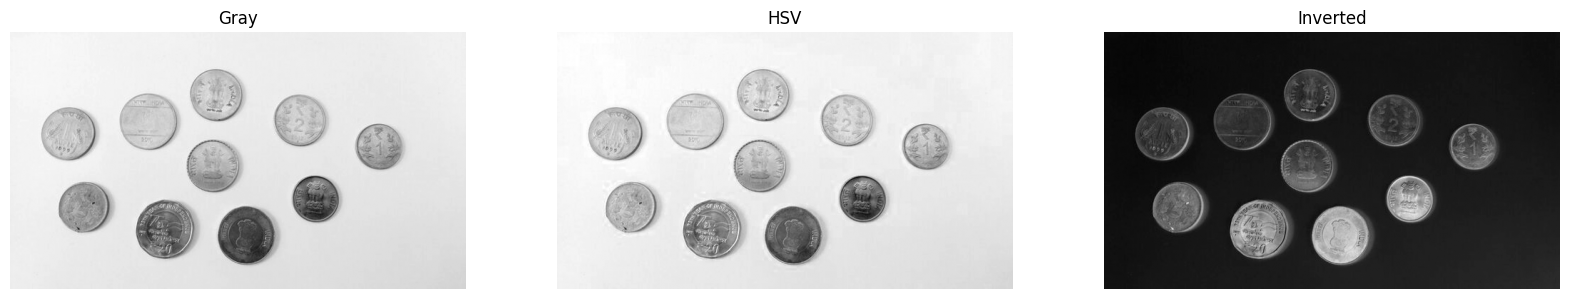

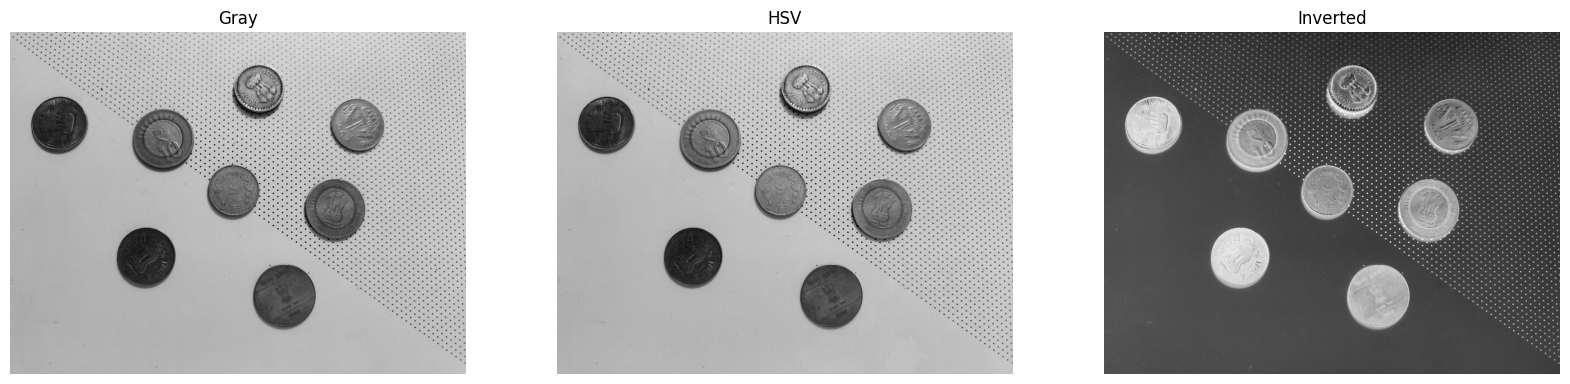

In [28]:
# Convert image to different color spaces
def convert_color_spaces(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)[:, :, 2]
    inverted = cv2.bitwise_not(gray)
    return gray, hsv, inverted

gray1, hsv1, inverted1 = convert_color_spaces(image1)
gray2, hsv2, inverted2 = convert_color_spaces(image2)
gray3, hsv3, inverted3 = convert_color_spaces(image3)

# Display images in different color spaces
def display_images(images, titles):
    fig, axs = plt.subplots(1, len(images), figsize=(20, 10))
    for i, (image, title) in enumerate(zip(images, titles)):
        axs[i].imshow(image, cmap='gray')
        axs[i].axis('off')
        axs[i].set_title(title)
    plt.show()

display_images([gray1, hsv1, inverted1], ['Gray', 'HSV', 'Inverted'])
display_images([gray2, hsv2, inverted2], ['Gray', 'HSV', 'Inverted'])
display_images([gray3, hsv3, inverted3], ['Gray', 'HSV', 'Inverted'])

In [29]:

def count_coins_1(edge_image, min_area=100):
    # Apply morphological closing to merge small gaps
    kernel = np.ones((3, 3), np.uint8)
    edges_closed = cv2.morphologyEx(edge_image, cv2.MORPH_CLOSE, kernel)

    # Find contours
    contours, _ = cv2.findContours(edges_closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter by area only
    filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

    return len(filtered_contours), filtered_contours

def count_coins_2(edge_image, min_area=100):
    # Apply morphological closing to merge small gaps
    kernel = np.ones((5, 5), np.uint8)
    edges_closed = cv2.morphologyEx(edge_image, cv2.MORPH_CLOSE, kernel)

    # Find contours
    contours, _ = cv2.findContours(edges_closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter by area only
    filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

    return len(filtered_contours), filtered_contours

def count_coins_3(edge_image, min_area=100):
    # Apply morphological closing to merge small gaps
    kernel = np.ones((7, 7), np.uint8)
    edges_closed = cv2.morphologyEx(edge_image, cv2.MORPH_CLOSE, kernel)

    # Find contours
    contours, _ = cv2.findContours(edges_closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter by area only
    filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

    return len(filtered_contours), filtered_contours



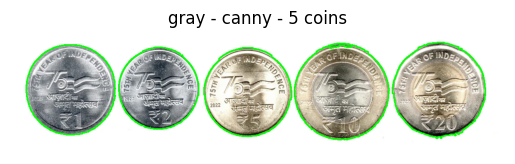

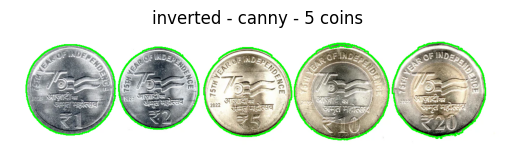

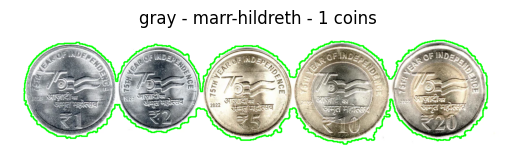

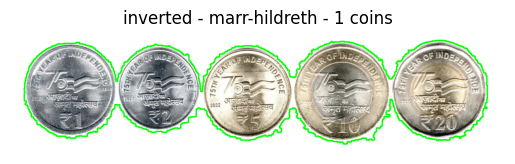

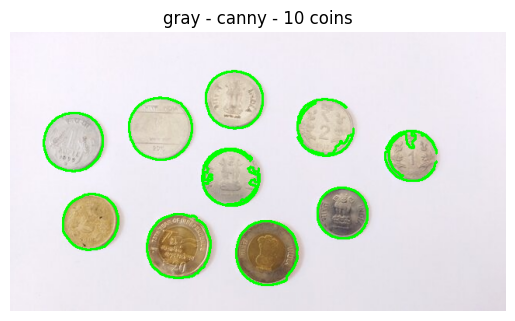

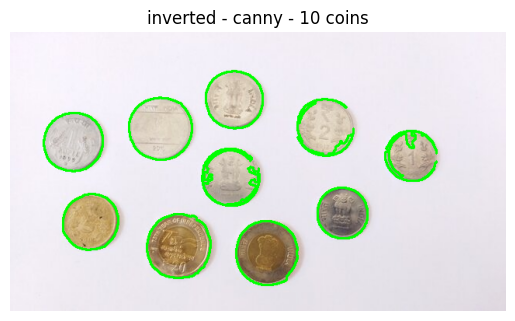

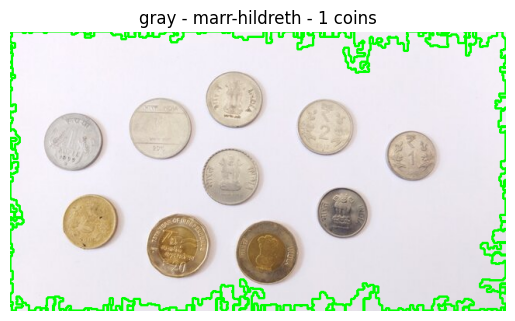

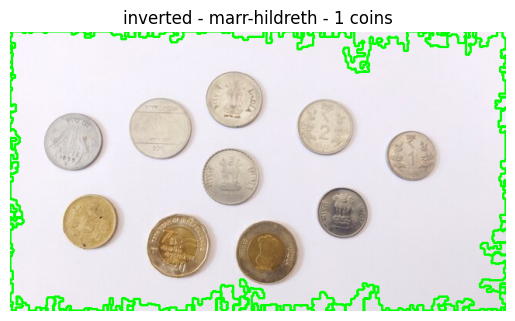

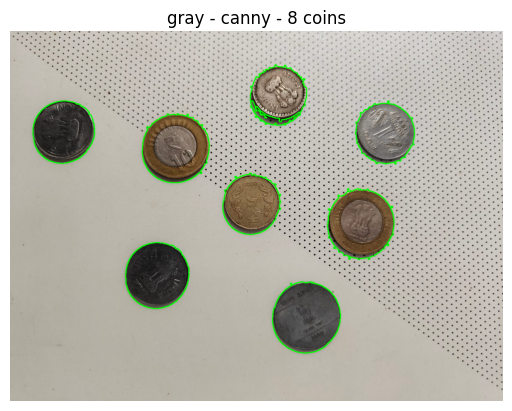

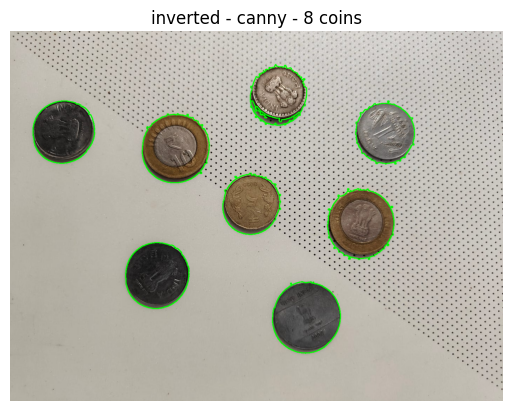

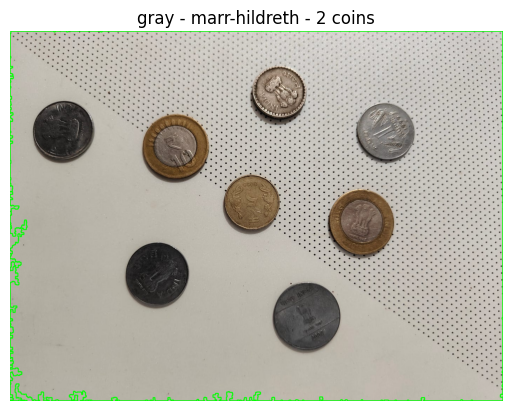

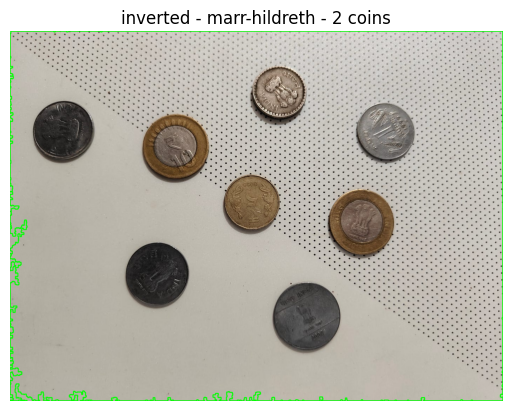

In [30]:
def edge_detection(image, color_space, method):
    if image is None:
        print("Error: Cannot perform edge detection on NoneType image.")
        return None

    if color_space == 'gray':
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    elif color_space == 'inverted':
        gray = cv2.bitwise_not(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY))
    else:
        print(f"Error: Unknown color space {color_space}")
        return None

    if method == 'canny':
        return cv2.Canny(gray, 100, 200)
    elif method == 'marr-hildreth':
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)
        edges = cv2.Laplacian(blurred, cv2.CV_64F)
        return cv2.convertScaleAbs(edges)  # Convert to 8-bit single-channel
    else:
        print(f"Error: Unknown edge detection method {method}")
        return None

# def display_count_coins_results(image, color_space, edge_detection_method ,min_area=100):
#     edge_image = edge_detection(image, color_space, edge_detection_method)
#     num_coins, contours = count_coins_1(edge_image, min_area)
#     image_with_contours = cv2.drawContours(image.copy(), contours, -1, (0, 255, 0), 2)
#     plt.imshow(image_with_contours)
#     plt.axis('off')
#     plt.title(f'{color_space} - {edge_detection_method} - {num_coins} coins')
#     plt.show()


def display_count_coins_results(image, color_space, edge_detection_method, count_coins_function_pointer ,min_area=100):
    edge_image = edge_detection(image, color_space, edge_detection_method)
    num_coins, contours = count_coins_function_pointer(edge_image, min_area)
    image_with_contours = cv2.drawContours(image.copy(), contours, -1, (0, 255, 0), 2)
    plt.imshow(image_with_contours)
    plt.axis('off')
    plt.title(f'{color_space} - {edge_detection_method} - {num_coins} coins')
    plt.show()

for edge_detection_method in ['canny', 'marr-hildreth']:
    for color_space in ['gray', 'inverted']:
        # display_count_coins_results(image1, color_space, edge_detection_method)
        display_count_coins_results(image1, color_space, edge_detection_method, count_coins_1)

for edge_detection_method in ['canny', 'marr-hildreth']:
    for color_space in ['gray', 'inverted']:
        # display_count_coins_results(image2, color_space, edge_detection_method)
        display_count_coins_results(image2, color_space, edge_detection_method, count_coins_1)

for edge_detection_method in ['canny', 'marr-hildreth']:
    for color_space in ['gray', 'inverted']:
        # display_count_coins_results(image3, color_space, edge_detection_method)
        display_count_coins_results(image3, color_space, edge_detection_method, count_coins_1)


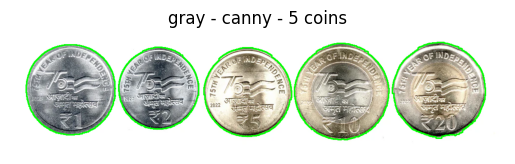

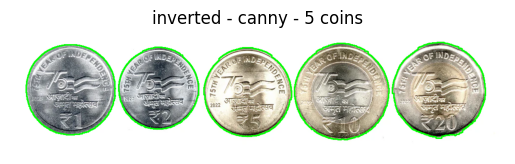

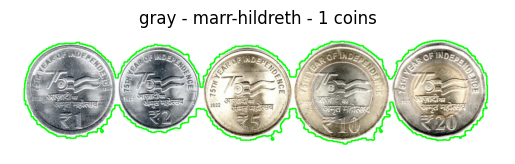

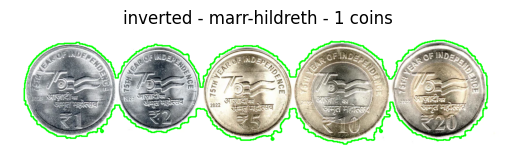

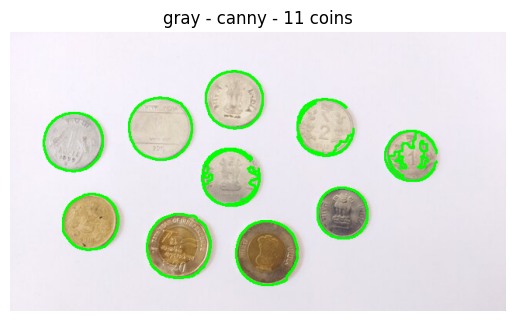

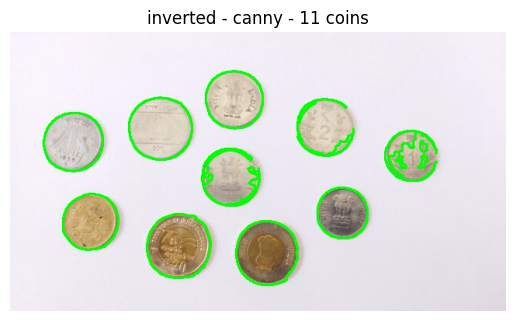

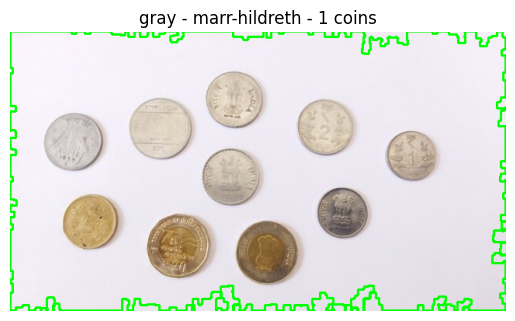

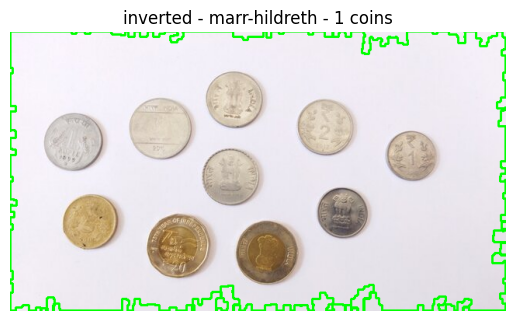

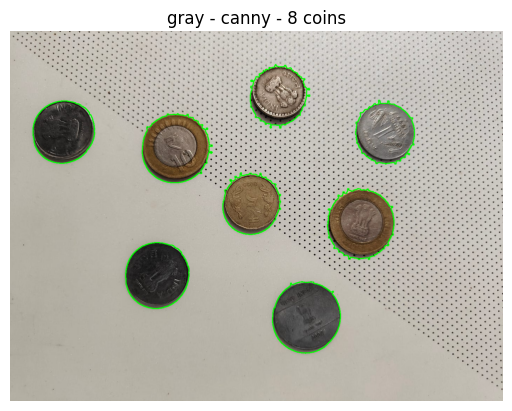

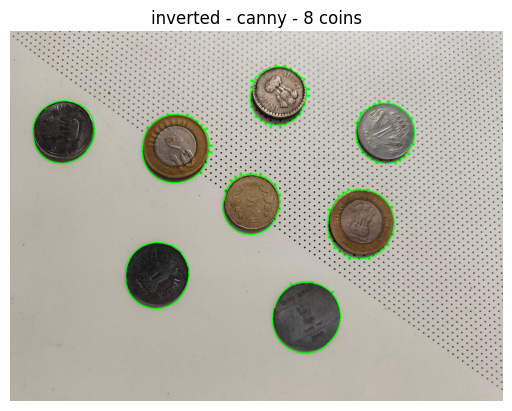

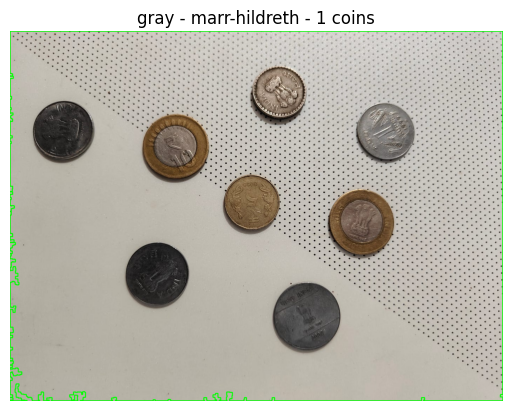

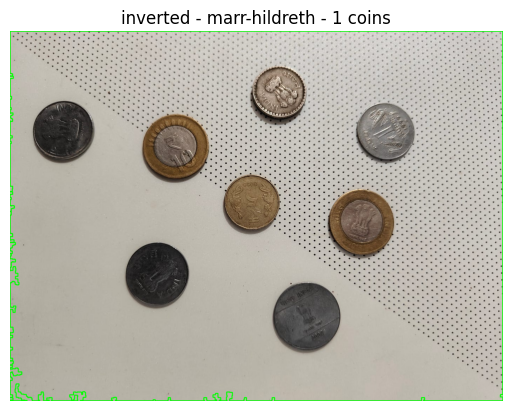

In [31]:

for edge_detection_method in ['canny', 'marr-hildreth']:
    for color_space in ['gray', 'inverted']:
        # display_count_coins_results(image1, color_space, edge_detection_method)
        display_count_coins_results(image1, color_space, edge_detection_method, count_coins_2)

for edge_detection_method in ['canny', 'marr-hildreth']:
    for color_space in ['gray', 'inverted']:
        # display_count_coins_results(image2, color_space, edge_detection_method)
        display_count_coins_results(image2, color_space, edge_detection_method, count_coins_2)


for edge_detection_method in ['canny', 'marr-hildreth']:
    for color_space in ['gray', 'inverted']:
        # display_count_coins_results(image3, color_space, edge_detection_method)
        display_count_coins_results(image3, color_space, edge_detection_method, count_coins_2)

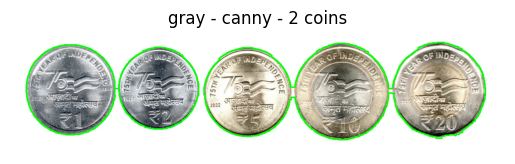

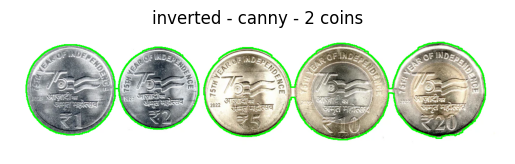

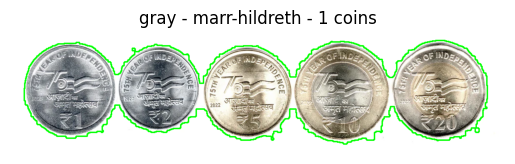

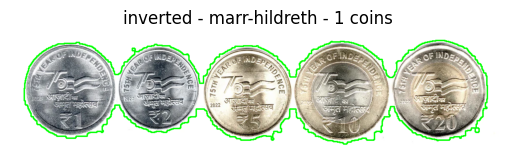

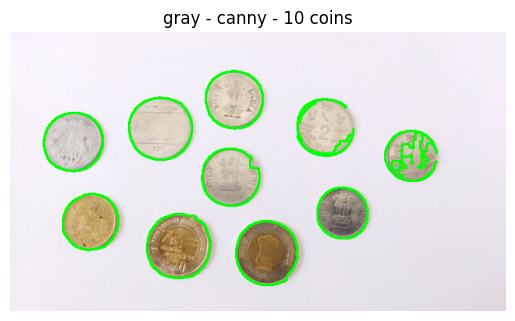

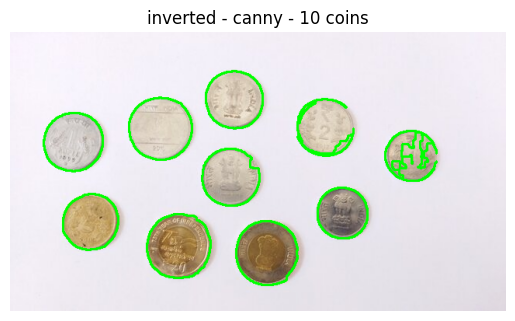

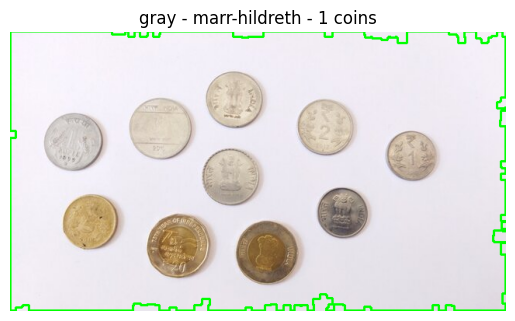

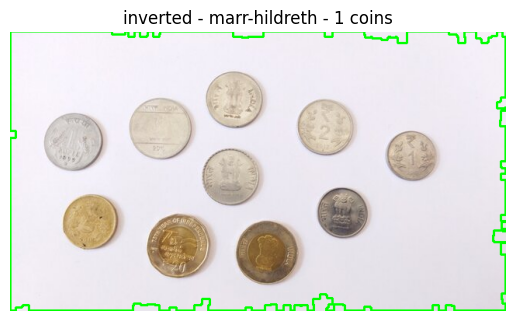

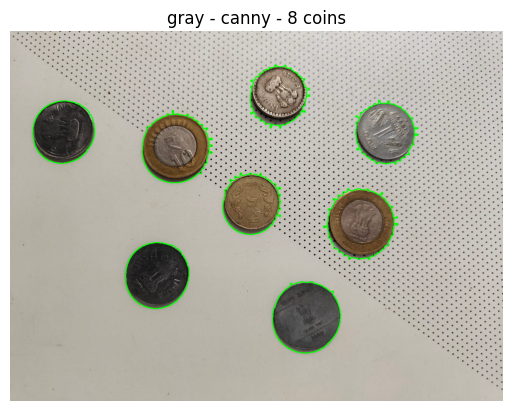

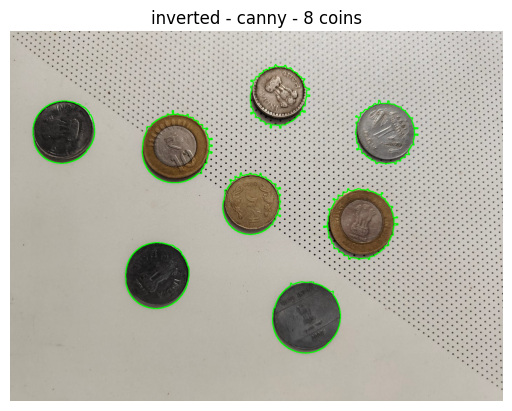

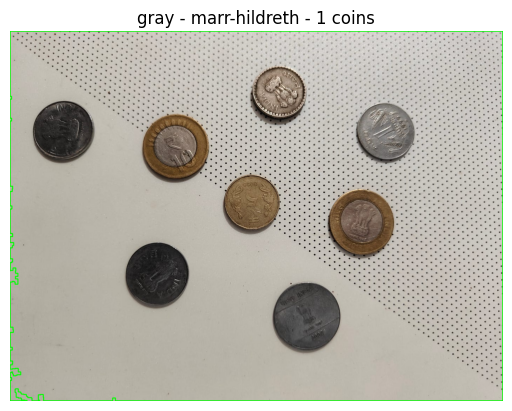

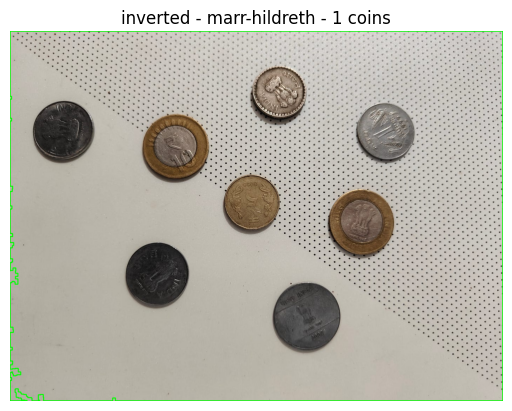

In [32]:

for edge_detection_method in ['canny', 'marr-hildreth']:
    for color_space in ['gray', 'inverted']:
        # display_count_coins_results(image1, color_space, edge_detection_method)
        display_count_coins_results(image1, color_space, edge_detection_method, count_coins_3)

for edge_detection_method in ['canny', 'marr-hildreth']:
    for color_space in ['gray', 'inverted']:
        # display_count_coins_results(image2, color_space, edge_detection_method)
        display_count_coins_results(image2, color_space, edge_detection_method, count_coins_3)


for edge_detection_method in ['canny', 'marr-hildreth']:
    for color_space in ['gray', 'inverted']:
        # display_count_coins_results(image3, color_space, edge_detection_method)
        display_count_coins_results(image3, color_space, edge_detection_method, count_coins_3)